In [4]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [13]:


def local_histogram_enhancement(image, k0=0, k1=0.25, k2=0, k3=0.1, C=22.8, tile_size=8):
    """
    Enhance low-contrast details in dark areas using histogram statistics.

    Parameters:
    - image: Input grayscale image (numpy array).
    - k0, k1: Range for selecting dark regions based on mean intensity.
    - k2, k3: Range for selecting low-contrast regions based on standard deviation.
    - C: Enhancement factor.
    - tile_size: Size of the local region for computing mean and std dev.

    Returns:
    - Enhanced image.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = image.shape
    enhanced_image = image.astype(np.float32)  # Convert to float for scaling

    # Compute global mean and standard deviation
    m_G = np.mean(image)
    sigma_G = np.std(image)

    # Process image in local tiles
    for i in range(0, h, tile_size):
        for j in range(0, w, tile_size):
            # Extract local region
            tile = image[i:i+tile_size, j:j+tile_size]

            # Compute local mean and standard deviation
            m_sxy = np.mean(tile)
            sigma_sxy = np.std(tile)

            # Check if the region meets enhancement criteria
            if (k0 * m_G <= m_sxy <= k1 * m_G) and (k2 * sigma_G <= sigma_sxy <= k3 * sigma_G):
                enhanced_image[i:i+tile_size, j:j+tile_size] = np.clip(C * tile, 0, 255)  # Scale intensity

    return enhanced_image.astype(np.uint8)  # Convert back to uint8



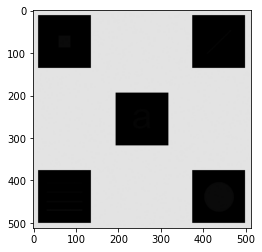

In [14]:
im_path = "../images/Fig0326(a)(embedded_square_noisy_512).tif"

img = cv2.imread(im_path)

plt.imshow(img)

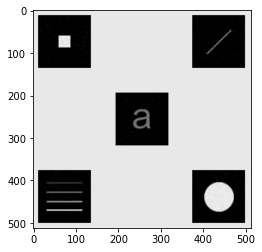

In [15]:
result_img = local_histogram_enhancement(img)

plt.imshow(result_img, cmap="gray")

In [12]:
sigma_G = np.mean(img)

sigma_G

160.65635681152344

In [18]:
np.max(img)

228

In [16]:
img[40:500, 400:500, :]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [227, 227, 227],
        [227, 227, 227]]